In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 20

# Training the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=len(train_images) / batch_size, 
                    epochs=epochs,
                    validation_data=(test_images, test_labels))


Epoch 1/20
781/781 [==============================] - 59s 73ms/step - loss: 1.8881 - accuracy: 0.1156 - val_loss: 1.4949 - val_accuracy: 0.0926
Epoch 2/20
781/781 [==============================] - 57s 73ms/step - loss: 1.6190 - accuracy: 0.0967 - val_loss: 1.3326 - val_accuracy: 0.0567
Epoch 3/20
781/781 [==============================] - 62s 79ms/step - loss: 1.4920 - accuracy: 0.0903 - val_loss: 1.2472 - val_accuracy: 0.0715
Epoch 4/20
781/781 [==============================] - 66s 84ms/step - loss: 1.4140 - accuracy: 0.0915 - val_loss: 1.3018 - val_accuracy: 0.1158
Epoch 5/20
781/781 [==============================] - 67s 85ms/step - loss: 1.3479 - accuracy: 0.0947 - val_loss: 1.2543 - val_accuracy: 0.0980
Epoch 6/20
781/781 [==============================] - 65s 83ms/step - loss: 1.2884 - accuracy: 0.0963 - val_loss: 1.1925 - val_accuracy: 0.0623
Epoch 7/20
781/781 [==============================] - 63s 80ms/step - loss: 1.2550 - accuracy: 0.0963 - val_loss: 1.0763 - val_accuracy:

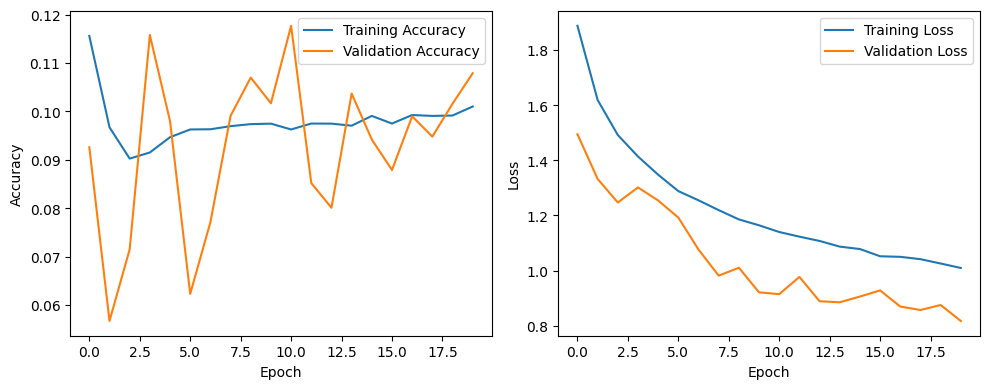

In [6]:
# Plot training/validation accuracy and loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




### Sample predicition 

1/1 [==============================] - 0s 133ms/step


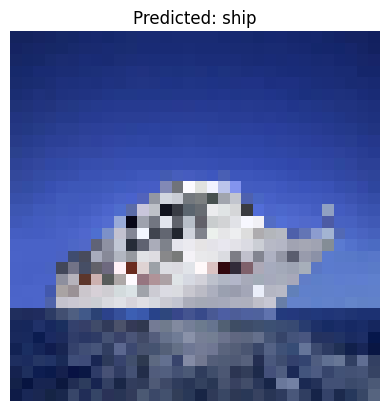

In [10]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load the saved model
# Assuming 'model' contains the trained model from the previous code

# Load a test image (you can replace this with your own image)
img_path = 'th.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Show the image and predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.show()